# Relatório de Análise VII

## Criando Agrupamentos

In [62]:
#Importando a biblioteca
import pandas as pd

In [63]:
#Leitura da Database e armazenamento em objeto
dados = pd.read_csv("Dados/aluguel_Residencial.csv", sep=";")
dados.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Apartamento
1,Apartamento,Ipanema,4,2,2,210,28000.0,3020.0,9247.0,133.33,Apartamento
2,Apartamento,Flamengo,3,0,0,115,2700.0,728.0,223.0,23.48,Apartamento
3,Apartamento,Bento Ribeiro,2,1,0,53,900.0,510.0,0.0,16.98,Apartamento
4,Apartamento,Leblon,4,3,1,178,15000.0,3000.0,0.0,84.27,Apartamento
5,Apartamento,Barra da Tijuca,2,1,1,94,2200.0,1379.0,252.0,23.40,Apartamento
6,Apartamento,Cachambi,2,1,0,70,1300.0,550.0,0.0,18.57,Apartamento
7,Apartamento,Todos os Santos,3,0,0,70,1000.0,340.0,15.0,14.29,Apartamento
8,Apartamento,Vila Isabel,3,1,0,80,1800.0,600.0,72.0,22.50,Apartamento
9,Apartamento,Tijuca,1,0,0,42,1600.0,550.0,20.0,38.10,Apartamento


In [64]:
#Visualiza separação dos Bairros
dados['Bairro'].drop_duplicates()

0                 Leblon
1                Ipanema
2               Flamengo
3          Bento Ribeiro
5        Barra da Tijuca
              ...       
19284     Senador Camará
19628            Paquetá
20319         Cachamorra
20721       Rio da Prata
20830       Vila Militar
Name: Bairro, Length: 152, dtype: object

In [65]:
#Agrupa os dados por Bairro
grupoBairros = dados.groupby('Bairro')
##grupoBairros.groups
##type(grupoBairros)

In [66]:
#Cria um dataFrame utilizando looping
bairrosMean = {'Bairro': [],'MediaPreço': []}
for bairro, data in grupoBairros:
        ##print('{} -> {}'.format(bairro,dados['Valor'].mean()))
        bairrosMean['Bairro'].append(bairro)
        bairrosMean['MediaPreço'].append(data['Valor'].mean())

bairrosMean = pd.DataFrame(bairrosMean)
bairrosMean.head(10)

,Bairro,MediaPreço
0,Abolição,1195.333333
1,Alto da Boa Vista,3966.666667
2,Anchieta,875.000000
3,Andaraí,1464.711340
4,Anil,2048.873239
5,Arpoador,12923.916667
6,Bancários,1825.000000
7,Bangu,1016.000000
8,Barra da Tijuca,7069.552938
9,Barra de Guaratiba,5550.000000


In [67]:
#Tira a média usando o objeto DataFrameGroupby
grupoBairros[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [69]:
#Cria um dataFrame utilizando o objeto DataFrameGroupby
bairrosMean = pd.DataFrame(grupoBairros['Valor'].mean())
bairrosMean.head(10)

,Valor
Bairro,
Abolição,1195.333333
Alto da Boa Vista,3966.666667
Anchieta,875.000000
Andaraí,1464.711340
Anil,2048.873239
Arpoador,12923.916667
Bancários,1825.000000
Bangu,1016.000000
Barra da Tijuca,7069.552938


## Estatísticas Descritivas

In [72]:
#Descreve os dados do agrupamento
grupoBairros['Valor'].describe().round(2).head(10)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.00,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.00,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.50,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.00,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.00,7000.0
Arpoador,12.0,12923.92,9064.21,4200.0,7325.0,8600.0,16221.75,30000.0
Bancários,4.0,1825.00,665.21,1300.0,1525.0,1600.0,1900.00,2800.0
Bangu,20.0,1016.00,347.24,400.0,825.0,950.0,1187.50,1650.0
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.00,600000.0


In [75]:
grupoBairros['Valor'].aggregate(['min','max']).rename(columns = {'min':'Mínimo', 'max':'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro do RJ')

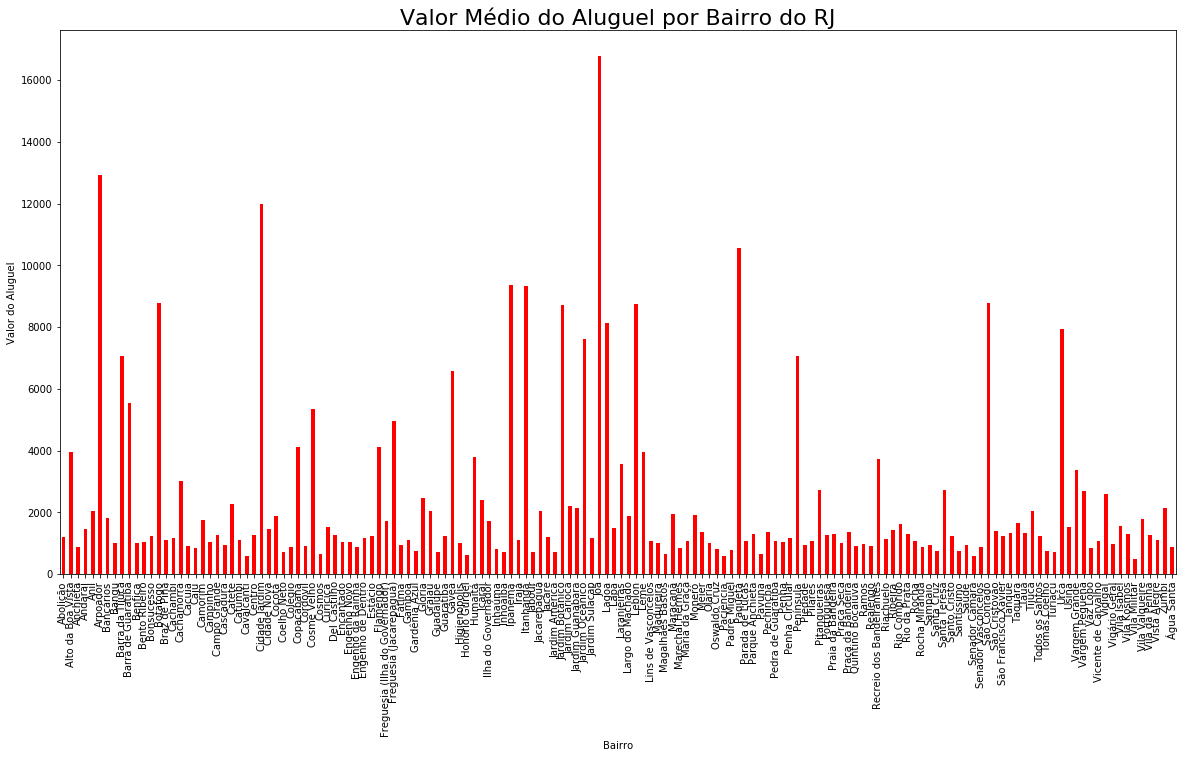

In [79]:
fig = grupoBairros['Valor'].mean().plot.bar(color = 'red')
fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro do RJ",{'fontsize':22})